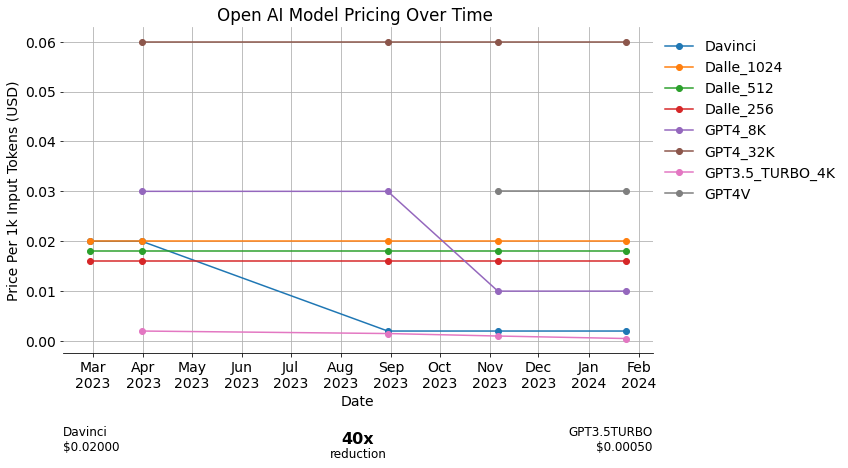

In [2]:
import matplotlib.pyplot as plt
import json
from datetime import datetime
import matplotlib.dates as mdates
import os
import matplotlib.lines as mlines

plt.rcParams.update({'font.size': 14}) 

# This is the JSON data provided earlier
json_data = {
  "pricing_data": [
    {
      "date": "2023-02-27",
      "models": {
        "Davinci": 0.0200,
        "Dalle_1024": 0.020,
        "Dalle_512": 0.018,
        "Dalle_256": 0.016
      }
    },
    {
      "date": "2023-03-31",
      "models": {
        "Davinci": 0.0200,
        "GPT4_8K": 0.03,
        "GPT4_32K": 0.06,
        "GPT3.5_TURBO_4K": 0.002,
        "Dalle_1024": 0.020,
        "Dalle_512": 0.018,
        "Dalle_256": 0.016
      }
    },
    {
      "date": "2023-08-30",
      "models": {
        "Davinci": 0.0020,
        "GPT4_8K": 0.03,
        "GPT4_32K": 0.06,
        "GPT3.5_TURBO_4K": 0.0015,
        # "GPT3.5_TURBO_16K": 0.003,
        "Dalle_1024": 0.020,
        "Dalle_512": 0.018,
        "Dalle_256": 0.016
      }
    },
    {
      "date": "2023-11-06",
      "models": {
        "GPT4_8K": 0.01,
        "GPT4_32K": 0.06,
        "GPT4V": 0.03,
        "GPT3.5_TURBO_4K": 0.0010,
        "Dalle_1024": 0.020,
        "Dalle_512": 0.018,
        "Dalle_256": 0.016,
        "Davinci": 0.0020
      }
    },
    {
      "date": "2024-01-24",
      "models": {
        "GPT4_8K": 0.01,
        "GPT4_32K": 0.06,
        "GPT4V": 0.03,
        "GPT3.5_TURBO_4K": 0.0005,
        "Dalle_1024": 0.020,
        "Dalle_512": 0.018,
        "Dalle_256": 0.016,
        "Davinci": 0.0020
      }
    }
  ]
}

# Initialize model prices dictionary with dates as keys and None as default values
model_prices = {entry['date']: {model: None for entry in json_data['pricing_data'] for model in entry['models']} for entry in json_data['pricing_data']}

max_davinciprice = 0.02
minprice = 0.0005
price_diff_mult = round(max_davinciprice / minprice, 0) 
# Populate the dictionary with actual prices
for entry in json_data['pricing_data']:
    date = entry['date']
    for model, price in entry['models'].items():
        model_prices[date][model] = price

# Prepare data for plotting
dates = [datetime.strptime(d, '%Y-%m-%d') for d in model_prices]  # Convert string dates to datetime objects
models = {model: [] for model in model_prices[next(iter(model_prices))]}  # Initialize list of prices for each model

# Create consistent pricing data for each model, including None for missing data points
for date in model_prices:
    for model in model_prices[date]:
        models[model].append(model_prices[date][model])

# Sort dates and align model prices with sorted dates
sorted_dates = sorted(dates)
sorted_models = {model: [models[model][dates.index(date)] for date in sorted_dates] for model in models}

# Create the plot
plt.figure(figsize=(12, 6))
for model, prices in sorted_models.items():
    plt.plot(sorted_dates, prices, label=model, marker='o')

# Format the plot
plt.xlabel('Date')
plt.ylabel('Price Per 1k Input Tokens (USD)')
plt.title('Open AI Model Pricing Over Time ')

# Change the date format on the x-axis to "Jan-2023"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False  )  # Move legend outside the plot
plt.tight_layout()  # Adjust the padding between and around the subplots
plt.grid(True)  # Add gridlines for better readability

ax = plt.gca()  # Get the current axes instance
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


# Add the horizontal line and text below the chart
annotation_y_value = -0.6
left_x, right_x = ax.get_xlim()
middle_x = (right_x - left_x) / 2 + left_x

custom_line = mlines.Line2D([left_x, right_x], [annotation_y_value]*2, transform=ax.get_yaxis_transform(), figure=ax.figure, color='black')
ax.add_artist(custom_line)

y_offset = 110
plt.annotate('Davinci\n${:.5f}'.format(max_davinciprice), xy=(left_x, annotation_y_value), xycoords=('data', 'axes fraction'), fontsize=12, va='center', xytext=(0, y_offset), textcoords='offset points')

plt.annotate('{:.0f}x'.format(price_diff_mult), xy=(middle_x, annotation_y_value), xycoords=('data', 'axes fraction'), fontsize=16, fontweight='bold', va='center', xytext=(0, y_offset), textcoords='offset points', ha='center')

plt.annotate('reduction'.format(price_diff_mult), xy=(middle_x, annotation_y_value), xycoords=('data', 'axes fraction'), fontsize=12, va='center', xytext=(0, y_offset-15), textcoords='offset points', ha='center')


plt.annotate('GPT3.5TURBO\n${:.5f}'.format(minprice), xy=(right_x, annotation_y_value), xycoords=('data', 'axes fraction'), fontsize=12, va='center', xytext=(0, y_offset), textcoords='offset points', ha='right')
 
# Add the dotted lines
os.makedirs('data', exist_ok=True)
plt.savefig('data/oai_pricing.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()

